<h1 align="center">$\textbf{Python performance exercises}$</h1>

## $\textbf{Python best practices exercises}$

### $\textbf{Exercise 1}$

$\textbf{considering the following function for concatenating list strings with deliter.}$

In [1]:
def ft_concatenate(l_strings, d):
    """concatenate list of strings into one string separated by delimeter"""
    
    res = l_strings[0]
    for e in l_strings[1:]:
        res = res + d + e
    return res

- profile the function and identify the bottlenecks.
- improve speed up of the function
*Hint: you may need to look to the string functions in python documentation*

### $\textbf{Profile the function and identify the bottlenecks}$

In [2]:
string = ["concatenate list of strings into one string separated by delimeter"]
name = "start"
%timeit ft_concatenate(string, name)

170 ns ± 4.5 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [3]:
%prun -s cumulative ft_concatenate(string, name)

In [4]:
%reload_ext line_profiler

In [5]:
%lprun -f ft_concatenate ft_concatenate(string, name)

The code line above shows that the initialization(res variable) and the loop inside the function **ft_concatenate** consumes almost the same time.

### $\textbf{Improve speed up of the function
}$

In [6]:
def ft_concatenate_join(l_strings, d):
    """concatenate list of strings into one string separated by delimeter"""
    
    return d.join(l_strings)

In [7]:
%timeit ft_concatenate_join(string, name)

110 ns ± 3.38 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


The implementation (**ft_concatenate_join**) above of **ft_concatenate** above runs faster than the suggested one. There is an improvement.

### $\textbf{Exercise 2}$

In this exercise you will solve the following problem using two methods bruteforce mehode, and fast method.

**Problem:** You are given a list of n integers, and your task is to calculate the number of distinct values in the list.

**Example**
- Input:
5
2 3 2 2 3

- Output:
2 ( 3 instead of 2 )

**Implement the following methodes:**

1. **bruteforce mehode:** create an empty list and start adding items for the given list without adding the previous item add, at the end the result list will contain unique values, print lenght of the list and you are done. 
2. **fast method** think of using Set data structure.

- time the two methods, what do you think?

### $\textbf{Bruteforce method}$

In [8]:
def distinct_brute(integers):
    """
    Calculating the number of distinct values in the list(integers)
    
    """
    
    distinct = []
    for i in range(len(integers)):
        if integers[i] not in distinct:
            
            distinct.append(integers[i])
            
    return len(distinct)

In [9]:
import numpy as np
integers = np.array([5,2,3,2,2,3])
distinct_brute(integers)

3

In [10]:
integers = np.array([5,2,3,2,2,3])
%timeit distinct_brute(integers)

1.43 µs ± 28.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### $\textbf{Write fast method}$

In [11]:
def distinct_fast(integers):
    """
    Calculating the number of distinct values in the list(integers)
    
    """
    
    distinct = set()
    for i in range(len(integers)):
        if integers[i] not in distinct:
            
            distinct.add(integers[i])
            
    return len(distinct)

In [12]:
integers = np.array([5,2,3,2,2,3])
distinct_fast(integers)

3

In [13]:
integers = np.array([5,2,3,2,2,3])
%timeit distinct_fast(integers)

1.4 µs ± 34.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [14]:
"""Creat two random lists of numbers for testing"""

integers = np.array([1,2,3,2,1,5,6,5,5,5])

### $\textbf{Time the two methods
}$

In [15]:
%timeit distinct_brute(integers)

2.26 µs ± 69.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [16]:
%timeit distinct_fast(integers)

2.2 µs ± 93 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


$\textbf{The distinct_fast implementation runs a little bit faster than the distinct_brute.}$

## $\textbf{Cython exercises}$

### $\textbf{Exercise 1}$

$\textbf{1. load the cython extension}$

In [18]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


2. Condidering the following polynome function:

In [19]:
def poly(a,b):
    return 10.5 * a + 3 * (b**2)

- Create an equivalent Cython function of `poly` with name `poly_cy` without any cython improvement, just make its cell a cython cell.

In [20]:
%%cython

def poly_cy(int a, int b):
    return 10.5 * a + 3 * (b**2)

$\textbf{3. time the performance of Python and Cython version of the function, what is the factor of speed up here between the two verions.}$

In [21]:
a, b =  np.array([899]), np.array([999])
%timeit poly(a,b)

3.41 µs ± 222 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [22]:
a, b =  np.array([899]), np.array([999])
%timeit poly_cy(a,b)

122 ns ± 3.49 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


$\textbf{The cython implementation runs faster than the one in pure python.}$

4. Now lets work on another examples using loop.
    - rewrite the same function below fib that calculate fibonacci series using cython, but now try to add type for the variables used inside it, add a prefix `_cy` to your new cython function.

In [23]:
def fib(n):
    a, b = 1, 1
    for i in range(n):
        a, b = a + b, a

    return a

$\textbf{Cython version}$

In [24]:
%%cython

def fib_cy(int n):
    cdef int a = 1
    cdef int b = 1
    cdef int i
    for i in range(n):
        a, b = a + b, a

    return a

- time the two function for fibonacci series, with n = 20, what is the factor of speed now, What do you think?

In [25]:
n = 20
%timeit fib(n)

1.02 µs ± 13.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [26]:
n = 20
%timeit fib_cy(n)

64.1 ns ± 2 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


$\textbf{The cython implementation runs faster than the one in pure python.}$

5. Recursive functions are functions that call themselves during their execution. Another interesting property of the Fibonacci series is that it can be written as a recursive function. That’s because each item depends on the values of other items (namely item n-1 and item n-2)

- Rewrite the fib function using recursion. Is it faster than the non-recursive version? Does Cythonizing it give even more of an advantage? 

In [27]:
def fib_recursive(n):
    if (n <= 1):
        return n
    else:
        return fib_recursive(n-1) + fib_recursive(n-2)

In [28]:
%%cython

def fib_recursive_cy(int n):
    if (n <= 1):
        return n
    else:
        return fib_recursive_cy(n-1) + fib_recursive_cy(n-2)

In [29]:
n = 20
%timeit fib_recursive(n)

1.9 ms ± 15.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [30]:
n = 20
%timeit fib_recursive_cy(n)

513 µs ± 16.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


$\textbf{Even the pure python implementation runs faster than the cython of the recursive one.}$

### $\textbf{Exercise 2}$

- Monte Carlo methods are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. 
- One of the basic examples of getting started with the Monte Carlo algorithm is the estimation of Pi.

**Estimation of Pi**

- The idea is to simulate random (x, y) points in a 2-D plane with domain as a square of side 1 unit. 
- Imagine a circle inside the same domain with same diameter and inscribed into the square. 
- We then calculate the ratio of number points that lied inside the circle and total number of generated points. 
- Refer to the image below:

![demo](../data/MonteCarloPlot.png)

We know that area of the square is 1 unit sq while that of circle is $\pi \ast  (\frac{1}{2})^{2} = \frac{\pi}{4}$. Now for a very large number of generated points,

![demo](../data/MonteCarloCalc.png)


## $\textbf{The Algorithm}$

1. Initialize cile_points, square_points and interval to 0.
2. Generate random point x.
3. Generate random point y.
4. Calculate d = x*x + y*y.
5. If d <= 1, increment circle_points.
6. Increment square_points.
7. Increment interval.
8. If increment < NO_OF_ITERATIONS, repeat from 2.
9. Calculate pi = 4*(circle_points/square_points).
10. Terminate.

**Your mission:** time the function `monte_carlo_pi`, identify the bottlenecks and create a new version using cython functionality to speed up monte carlo simulation for PI, use 100,000 points and compare the speed up factor between python and cython, considering the following optimizations:
- add type for variables used.
- add type for the function
- use c rand function instead of python rand function.
 
*Hint: you can import function from C libraries using the following approach `from libc.<name of c library> cimport <library function name>`, replace the holders `<>` with the right identities for the current problem*

In [31]:
import random as rand

def monte_carlo_pi(nsamples):
    pi = 0.
    
    circle_points = 0
    
    for _ in range(nsamples):
        x = rand.uniform(-1, 1)
        y = rand.uniform(-1, 1)
        d = (x*x) + (y*y)
        
        if d <= 1:
            circle_points +=1
            
    pi = 4*(circle_points/nsamples)
    
    return pi

In [32]:
nsamples = 100_0000
monte_carlo_pi(nsamples)

3.1408

In [33]:
nsamples = 100_0000
%timeit monte_carlo_pi(nsamples)

578 ms ± 23.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
%%cython

import random as rand

def monte_carlo_pi_cy(int nsamples):
    cdef float pi = 0.
    
    cdef int circle_points = 0
    cdef float x
    cdef float y

    for _ in range(nsamples):
        x = rand.uniform(-1, 1)
        y = rand.uniform(-1, 1)
        
        if (x*x) + (y*y) <= 1:
            circle_points +=1
            
    pi = 4*(circle_points/nsamples)
    
    return pi

In [35]:
nsamples = 100_0000
monte_carlo_pi_cy(nsamples)

3.1401560306549072

In [36]:
nsamples = 100_0000
%timeit monte_carlo_pi(nsamples)

566 ms ± 22.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
nsamples = 100_0000
%timeit monte_carlo_pi_cy(nsamples)

389 ms ± 19.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


$\textbf{Cython implementation runs faster than the pure python one as shown above.}$

## $\textbf{Numba exercises}$

### $\textbf{Exercise 1}$

Previously we considered how to approximateby Monte Carlo.

- Use the same idea here, but make the code efficient using Numba.
- Compare speed with and without Numba when the sample size is large.

In [38]:
from numba import njit

@njit
def monte_carlo_pi_numba(nsamples):
    pi = 0.
    
    circle_points = 0
    
    for _ in range(nsamples):
        x = rand.uniform(-1, 1)
        y = rand.uniform(-1, 1)
        d = (x*x) + (y*y)
        
        if d <= 1:
            circle_points +=1
            
    pi = 4*(circle_points/nsamples)
    
    return pi

In [39]:
nsamples = 100_0000
monte_carlo_pi_numba(nsamples)

3.142716

In [40]:
nsamples = 100_0000
%timeit monte_carlo_pi_numba(nsamples)

10.8 ms ± 69.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


$\textbf{Numba does much better than both Cython and pure python implementations. }$

## $\textbf{Pyccel Exercises}$

### $\textbf{Exercise 1}$

considering the following algorithm for binomial coefficient implementation in python.
```python
def factorial(n : int) -> int:
    # to be implemented

def binomial_coefficient(n : int, k : int):
    num = factorial(n)
    den = factorial(k) * factorial(n - k)
    return num // den
```
1. complete the factorial function using recursive methode.
2. profile the `binomial_coefficient`.
3. try to improve factorial function by using iterative method.
4. Use pyccel to accelerate the function.
5. compare the benchmark of the two version python vs pyccel.

In [41]:
def factorial(n : int) -> int:
    if n == 0:
        return 1
    return n*factorial(n-1)

def binomial_coefficient(n : int, k : int):
    num = factorial(n)
    den = factorial(k) * factorial(n - k)
    
    return num // den

In [42]:
n, k = 100, 50
binomial_coefficient(n, k)

100891344545564193334812497256

$\textbf{Profiling binomial_coefficient}$

In [43]:
n, k = 100, 50
%timeit binomial_coefficient(n, k)

25.1 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [44]:
n, k = 100, 50
%prun -s cumulative binomial_coefficient(n, k)

In [45]:
n, k = 100, 50
%lprun -f binomial_coefficient binomial_coefficient(n, k)

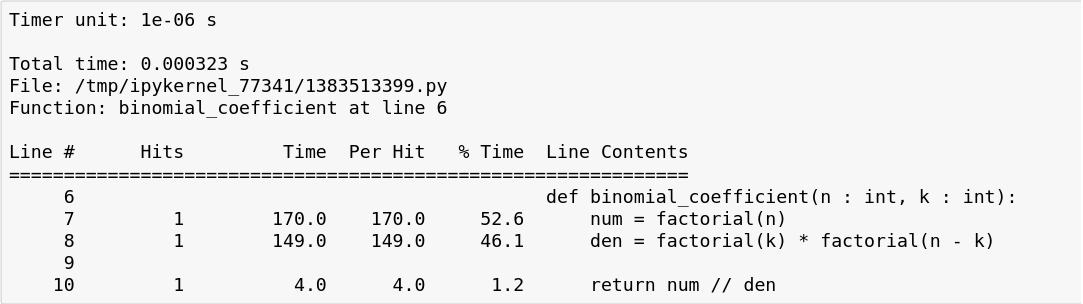

In [46]:
file = "profiling.png"
from IPython.display import Image
Image(filename=file) 

$\textbf{The factorial function is consuming the whole itself.}$

### $\textbf{Iterative method.}$

In [50]:
def factorial_iterative(n : int) -> int:
    
    if n == 0 or n == 1:
        return (1)
    else:
        res = 1
        for i in range(1, n+1):
            res *=i
            
        return res

def binomial_coefficient_iterative(n : int, k : int):
    num = factorial_iterative(n)
    den = factorial_iterative(k) * factorial_iterative(n - k)
    
    return num // den

In [51]:
n, k = 100, 50
%timeit binomial_coefficient(n, k)

27 µs ± 2.41 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [52]:
n, k = 100, 50
%timeit binomial_coefficient_iterative(n, k)

12.7 µs ± 472 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


$\textbf{The iterative method does a little bit better than the implementation using recursivity.}$

$\textbf{Pyccel implementation}$

In [53]:
from pyccel.epyccel import epyccel

def factorial_iterative_pyccel(n : 'int'):
    
    if n == 0 or n == 1:
        return (1)
    else:
        res = 1
        for i in range(1, n+1):
            res *=i
            
        return res
    

In [54]:
factorial_iterative_pyccel_90 = epyccel(factorial_iterative_pyccel)

In [55]:
n = 10
%timeit factorial_iterative_pyccel_90(n)

119 ns ± 0.898 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [439]:
n = 10
factorial_iterative_pyccel_90(n)

3628800

In [440]:
def binomial_coefficient_iterative_pyccel(n : 'int', k : 'int'):
    num = factorial_iterative_pyccel_90(n)
    den = factorial_iterative_pyccel_90(k) * factorial_iterative_pyccel_90(n - k)
    
    return num // den

In [442]:
n, k = 100, 50
%timeit binomial_coefficient_iterative_pyccel(n, k)

646 ns ± 19.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


$\textbf{Finally, pyccel does much better than the pure and iterative implementation.}$